**OCR (Optical Character Recognition - Optik Karakter Tanıma)**, resim veya taranmış belgelerdeki yazıları dijital metne dönüştürmek için kullanılan bir tekniktir. Tesseract ve EasyOCR, OCR işlemleri için yaygın olarak kullanılan iki Python kütüphanesidir.<br><br>
  **Tesseract**, Google tarafından geliştirilen açık kaynaklı bir OCR motorudur.
  Esnekliği ve yüksek doğruluğu nedeniyle çok popülerdir.<br>
  Özellikler:<br>
	•	Çok Dilli Destek: 100’den fazla dilde OCR işlemi yapabilir. Özelleştirilmiş dil modelleri oluşturma imkanı sunar.<br>
	•	Düzenli Metin Çıktısı: Metinleri satır satır veya kelime kelime çıkarabilir.<br>
	•	Konfigürasyon Yeteneği: OCR işlemi sırasında farklı parametreler ile özelleştirilebilir.<br>
	•	Düzenli İfade Desteği: Çıktıyı düzenlemek için regex (düzenli ifadeler) kullanılabilir.<br>
	•	Performans: Büyük dosyalar üzerinde çalışırken güçlüdür ancak modern tekniklere göre daha yavaş kalabilir.<br>

**EasyOCR**, PyTorch tabanlı modern bir OCR kütüphanesidir. Özellikle deep learning algoritmalarını kullandığı için güçlü bir performans sunar ve daha karmaşık OCR senaryolarında başarılıdır.<br>
Özellikler:<br>
	•	Modern Teknoloji Kullanımı: Convolutional Neural Networks (CNN) ve Recurrent Neural Networks (RNN) tabanlı bir model kullanır.<br>
	•	Daha Kolay Kullanım: Kullanıcı dostu API’ler sağlar.<br>
	•	Çok Dilli Destek: 80+ dili destekler.<br>
	•	El Yazısı Desteği: Karmaşık el yazısı karakterlerini tanıyabilir.<br>
	•	Hız ve Performans: Tesseract’a göre daha hızlı ve doğruluk oranı yüksek olabilir, ancak daha fazla işlem gücü gerektirebilir.<br>






In [1]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [2]:
import easyocr
import cv2

In [3]:
print(cv2.__version__)

4.10.0


In [4]:
reader = easyocr.Reader(['tr', 'en'], gpu=True)

**reader = easyocr.Reader(['tr', 'en'], gpu=False)**: easyocr kütüphanesinden bir okuyucu oluşturuyoruz. Bu okuyucu, Türkçe ve İngilizce dillerini tanıyacak şekilde ayarlanmıştır (['tr', 'en']).

**gpu=False** parametresi, grafik işlemciyi kullanmayacağımızı belirtir, bu nedenle işlemci tabanlı bir çözüm kullanılır.

In [5]:
img1 = cv2.imread("/kaggle/input/elektrik-sayac/Akilli-elektrik-sayaci.png", cv2.IMREAD_COLOR)

Resim başarıyla yüklendi.


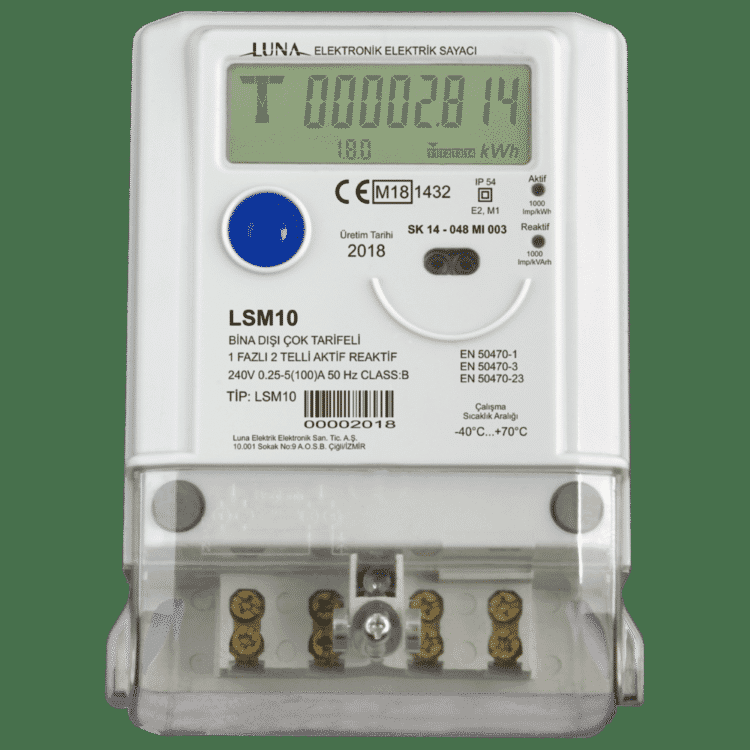

In [6]:
# Kontrol etme
if img1 is None:
    print("Resim yüklenemedi. Dosya yolu veya formatı kontrol edin.")
else:
    print("Resim başarıyla yüklendi.")
    # Resmi gösterme (isteğe bağlı)
    from google.colab.patches import cv2_imshow  # Import for displaying in Colab
    cv2_imshow(img1)


In [7]:
# Ensure the image is loaded correctly
if img1 is None:
	raise ValueError("Image not loaded. Please check the file path.")

# Perform OCR on the image
results = reader.readtext(img1, detail=1, paragraph=True)

**results_paragraph = reader.readtext(img, detail=1, paragraph=True):** Oluşturduğumuz okuyucu kullanarak resimdeki metni okur.

**detail=1** detaylı sonuçları almayı sağlar ve

**paragraph=True** ile metin paragraf olarak alınır.

In [8]:
results

[[[[247, 39], [553, 39], [553, 266], [247, 266]],
  'LUnA ELEKTRONIK ELEKTRIK SAYACI 000bzb 80 nirzuana kWh ( €Mig]1432 E2, 11 Inpat Qrcin Tenn SK 14 - 048 Mi 003 Reaktif 2018 Iroavarh'],
 [[[225, 304], [411, 304], [411, 405], [225, 405]],
  'LSM1O BINA DISI ÇOK TARIFELI FAZLI 2 TELLI AKTIF REAKTIF 240V 0.25-5(100A 50 Hz CLASS B TIP: LSM1O'],
 [[[459, 347], [527, 347], [527, 385], [459, 385]],
  'EN 50+70-1 EN 50+70-3 EN 50*70-23'],
 [[[474, 402], [506, 402], [506, 410], [474, 410]], 'Cnsm'],
 [[[455, 409], [531, 409], [531, 439], [455, 439]], 'SicaAral 40 C +70 C'],
 [[[232, 419], [397, 419], [397, 450], [232, 450]],
  '00002018 Ehr Elntta San 1c4s 10001 Squa Ko94o5b Cavlnr']]

In [9]:
results = reader.readtext(img1, detail=1, paragraph=False)

In [10]:
results

[([[247, 39], [305, 39], [305, 59], [247, 59]], 'LUnA', 0.4743146598339081),
 ([[312, 42], [477, 42], [477, 59], [312, 59]],
  'ELEKTRONIK ELEKTRIK SAYACI',
  0.8028129333087954),
 ([[294, 66], [476, 66], [476, 138], [294, 138]],
  '000bzb',
  0.05392073662104017),
 ([[332, 134], [376, 134], [376, 164], [332, 164]], '80', 0.5314324745942695),
 ([[425, 141], [523, 141], [523, 161], [425, 161]],
  'nirzuana kWh',
  0.044554275877816706),
 ([[331, 175], [457, 175], [457, 211], [331, 211]],
  '( €Mig]1432',
  0.3573671302210799),
 ([[471, 205], [503, 205], [503, 217], [471, 217]],
  'E2, 11',
  0.23456532521251386),
 ([[522, 208], [550, 208], [550, 216], [522, 216]],
  'Inpat',
  0.28627759915789086),
 ([[370, 230], [394, 230], [394, 238], [370, 238]],
  'Tenn',
  0.5185317397117615),
 ([[407, 223], [509, 223], [509, 237], [407, 237]],
  'SK 14 - 048 Mi 003',
  0.611246981944845),
 ([[519, 221], [553, 221], [553, 233], [519, 233]],
  'Reaktif',
  0.6253635655487937),
 ([[345, 241], [389, 2

In [11]:
results = reader.readtext(img1)

In [12]:
results

[([[247, 39], [305, 39], [305, 59], [247, 59]], 'LUnA', 0.4743146598339081),
 ([[312, 42], [477, 42], [477, 59], [312, 59]],
  'ELEKTRONIK ELEKTRIK SAYACI',
  0.8028129333087954),
 ([[294, 66], [476, 66], [476, 138], [294, 138]],
  '000bzb',
  0.05392073662104017),
 ([[332, 134], [376, 134], [376, 164], [332, 164]], '80', 0.5314324745942695),
 ([[425, 141], [523, 141], [523, 161], [425, 161]],
  'nirzuana kWh',
  0.044554275877816706),
 ([[331, 175], [457, 175], [457, 211], [331, 211]],
  '( €Mig]1432',
  0.3573671302210799),
 ([[471, 205], [503, 205], [503, 217], [471, 217]],
  'E2, 11',
  0.23456532521251386),
 ([[522, 208], [550, 208], [550, 216], [522, 216]],
  'Inpat',
  0.28627759915789086),
 ([[370, 230], [394, 230], [394, 238], [370, 238]],
  'Tenn',
  0.5185317397117615),
 ([[407, 223], [509, 223], [509, 237], [407, 237]],
  'SK 14 - 048 Mi 003',
  0.611246981944845),
 ([[519, 221], [553, 221], [553, 233], [519, 233]],
  'Reaktif',
  0.6253635655487937),
 ([[345, 241], [389, 2

In [13]:
results = reader.readtext(img1, detail=1,allowlist="0123456789", paragraph=True)

In [14]:
results

[[[[247, 39], [553, 39], [553, 266], [247, 266]],
  '13 72777017175871 000828 80 654 241181432 0211 6 01 7 561440481003 3 2018 9'],
 [[[225, 304], [411, 304], [411, 405], [225, 405]],
  '45110 124018177673211 7112111467476 240102552100450524838 7213110'],
 [[[459, 347], [527, 347], [527, 385], [459, 385]],
  '01504701 01504703 215087023'],
 [[[474, 402], [506, 402], [506, 410], [474, 410]], '7'],
 [[[455, 409], [531, 409], [531, 439], [455, 439]], '54 405 4705'],
 [[[232, 419], [397, 419], [397, 450], [232, 450]],
  '00002018 65401248 1000150680940586']]

 Yukarıda kısmen yaptığımız gibi çıktıyı özelleştirerek sadece okunmasını sağlayabiliriz.

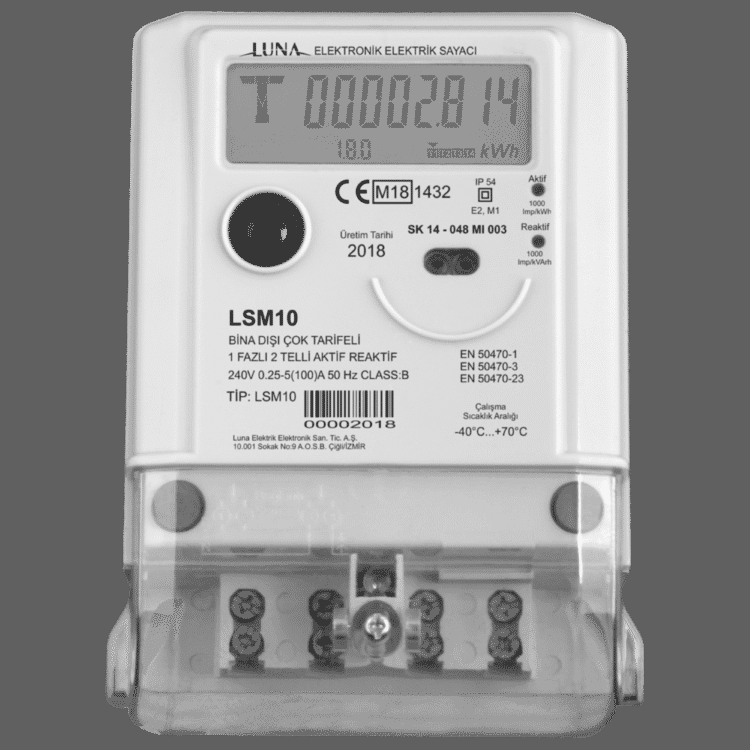

In [15]:
grayimg = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # resmi gri tonlama yaparak daha kolay okunmasını sağlayabiliriz

from google.colab.patches import cv2_imshow
cv2_imshow(grayimg)


In [16]:
results = reader.readtext(grayimg, detail=0, paragraph=True, allowlist="0123456789")

In [17]:
results

['13 72777017175871 000828 180 654 24171432 22141 6 01 7 561440481003 3 2018 9',
 '45110 124018177673211 7112111467476 240102552100450524838 7213110',
 '01504701 01504703 215087023',
 '5280 405 4705',
 '00002018 65401248 1000150680940586']

In [18]:
cropped_image = grayimg[65:160, 230:530]

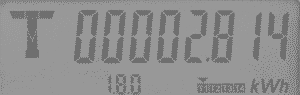

In [19]:
from google.colab.patches import cv2_imshow
cv2_imshow(cropped_image)


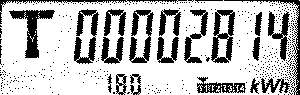

In [20]:
_, binary_image = cv2.threshold(cropped_image, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)

In [21]:
results = reader.readtext(binary_image, detail=0, paragraph=True,allowlist="0123456789")

print("Gösterge alanındaki metin:",results)

Gösterge alanındaki metin: ['0882814 80 24673']


In [22]:
denoised_image = cv2.fastNlMeansDenoising(binary_image, None, 30, 7, 21)

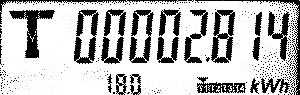

In [23]:
cv2_imshow(denoised_image)

In [24]:
results = reader.readtext(denoised_image, detail=0, paragraph=False,allowlist="0123456789")

print("Gösterge alanındaki metin:",results)

Gösterge alanındaki metin: ['0882814', '585']


In [25]:
import numpy as np
kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(cropped_image, -1, kernel)

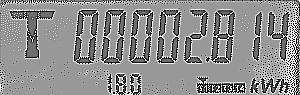

In [26]:
cv2_imshow(sharpened_image)

In [27]:
results = reader.readtext(denoised_image, detail=0, paragraph=False,allowlist="0123456789")

print("Gösterge alanındaki metin:",results)

Gösterge alanındaki metin: ['0882814', '585']


In [28]:
import pytesseract

# Eşikleme ile görüntüyü netleştirmek için;
thresh = cv2.threshold(cropped_image, 150, 255, cv2.THRESH_BINARY_INV)[1]

# Gürültüyü azaltmak için;
thresh = cv2.medianBlur(thresh, 3)

# OCR işlemi (sadece sayıları tanıması için whitelist kullan)
custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789'
text = pytesseract.image_to_string(thresh, config=custom_config)

# Sonucu temizlemek (boşlukları ve gereksiz karakterleri kaldırır)
#text = ''.join(filter(str.isdigit, text))

print("Sayaç Değeri:",text)


Sayaç Değeri: 


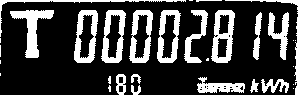

In [29]:
cv2_imshow(thresh)

In [30]:
# OCR işlemi (sadece sayıları tanıması için whitelist kullan)
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'
text = pytesseract.image_to_string(cropped_image, config=custom_config)

print("Sayaç Değeri:",text)

Sayaç Değeri: 00028



In [31]:
# OCR işlemi (sadece sayıları tanıması için whitelist kullan)
custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789'
text = pytesseract.image_to_string(cropped_image, config=custom_config)

print("Sayaç Değeri:",text)

Sayaç Değeri: 00028



In [32]:
# OCR işlemi (sadece sayıları tanıması için whitelist kullan)
custom_config = r'--oem 3 --psm 3 -c tessedit_char_whitelist=0123456789'
text = pytesseract.image_to_string(cropped_image, config=custom_config)

print("Sayaç Değeri:",text)

Sayaç Değeri:  



In [33]:
# OCR işlemi (sadece sayıları tanıması için whitelist kullan)
custom_config = r'--psm 3 -c tessedit_char_whitelist=0123456789'
text = pytesseract.image_to_string(cropped_image, config=custom_config)

print("Sayaç Değeri:",text)

Sayaç Değeri:  



In [34]:
text = pytesseract.image_to_string(cropped_image, config=custom_config)

print("Sayaç Değeri:",text)

Sayaç Değeri:  



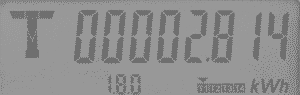

In [35]:
cv2_imshow(cropped_image)